In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

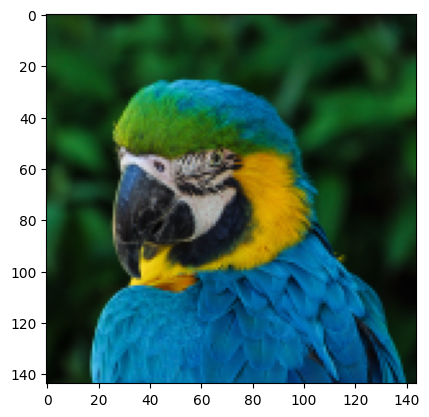

In [2]:
image = cv2.imread('test.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image[...,::-1])
plt.show()

`Histograms by Color`
---

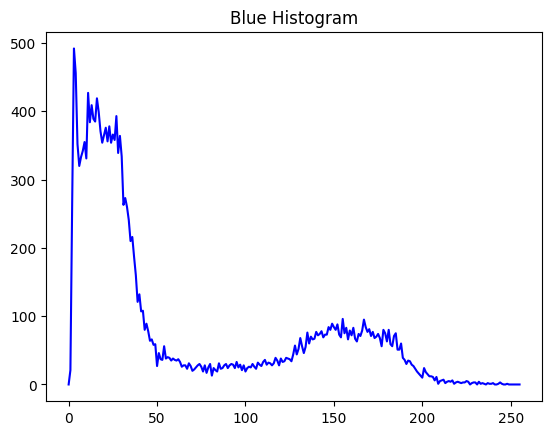

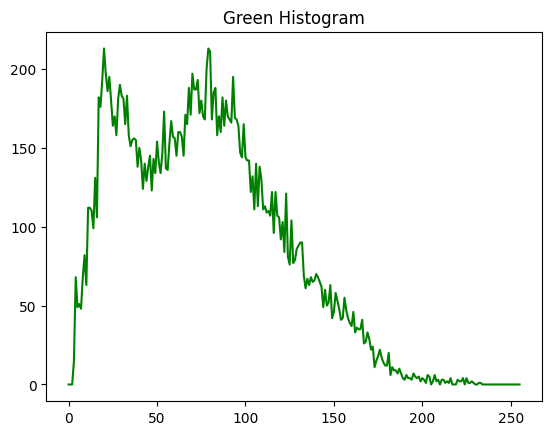

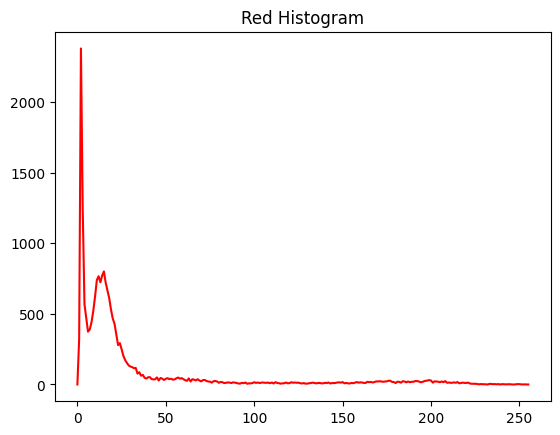

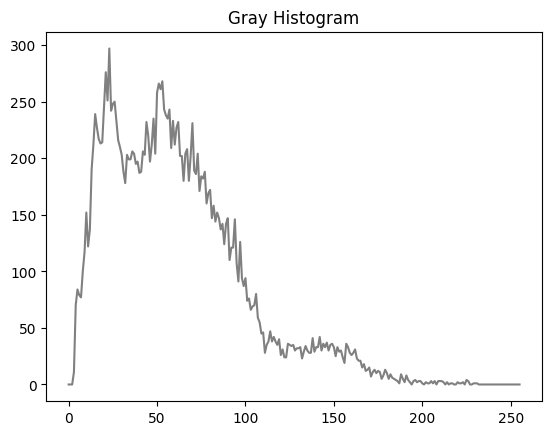

In [3]:
blue_histogram = cv2.calcHist(images = [image], channels = [0], mask = None, histSize = [256], ranges = [0, 256]) # 'histSize': number of bins
green_histogram = cv2.calcHist(images = [image], channels = [1], mask = None, histSize = [256], ranges = [0, 256])
red_histogram = cv2.calcHist(images = [image], channels = [2], mask = None, histSize = [256], ranges = [0, 256])
gray_histogram = cv2.calcHist(images = [gray_image], channels = [0], mask = None, histSize = [256], ranges = [0, 256])

plt.plot(blue_histogram, color = 'blue'); plt.title('Blue Histogram'); plt.show()
plt.plot(green_histogram, color = 'green'); plt.title('Green Histogram');plt.show()
plt.plot(red_histogram, color = 'red'); plt.title('Red Histogram');plt.show()
plt.plot(gray_histogram, color = 'gray'); plt.title('Gray Histogram');plt.show()

`Subplots`
---

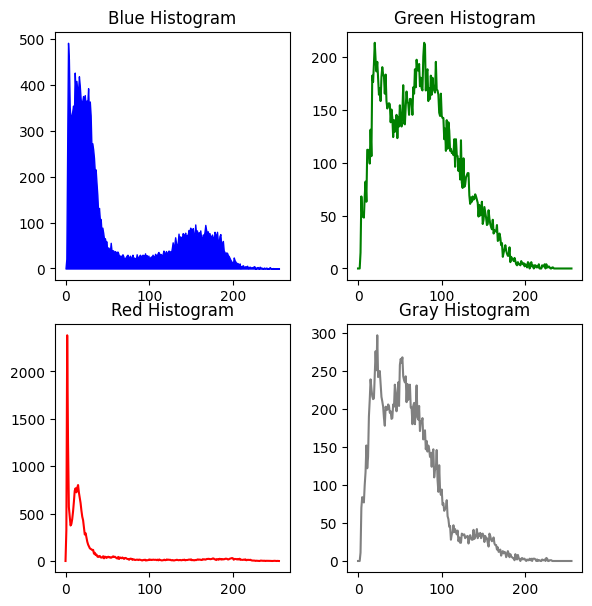

In [4]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (6, 6))
fig.tight_layout()

x = np.arange(256)
# blue
axes[0,0].fill_between(x, blue_histogram[...,0], color = 'blue')
axes[0,0].set_title('Blue Histogram')
# green
axes[0,1].plot(green_histogram, color = 'green')
axes[0,1].set_title('Green Histogram')
# red
axes[1,0].plot(red_histogram, color = 'red')
axes[1,0].set_title('Red Histogram')
# gray
axes[1,1].plot(gray_histogram, color = 'gray')
axes[1,1].set_title('Gray Histogram')

plt.show()

`Gradient Histograms`
---

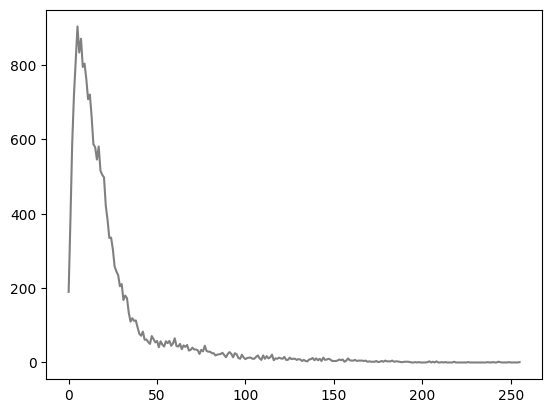

In [5]:
sobelx = cv2.Sobel(src = gray_image, ddepth = cv2.CV_64F, dx = 1, dy = 0, ksize = 5)
sobely = cv2.Sobel(src = gray_image, ddepth = cv2.CV_64F, dx = 0, dy = 1, ksize = 5)

sobel = np.sqrt(sobelx**2 + sobely**2)
sobel = (sobel / sobel.max() * 255).astype(dtype = np.uint8)

sobel_histogram = cv2.calcHist(images = [sobel], channels = [0], mask = None, histSize = [256], ranges = [0, 256])

plt.plot(sobel_histogram, color = 'gray')
plt.show()

(array([[0.000e+00, 0.000e+00, 8.640e+02, 8.090e+02, 8.080e+02, 8.340e+02,
         7.310e+02, 6.320e+02, 0.000e+00, 0.000e+00],
        [0.000e+00, 1.024e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 1.000e+00, 7.750e+02, 0.000e+00],
        [8.260e+02, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 6.000e+00, 5.960e+02],
        [7.130e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 6.140e+02],
        [8.830e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 7.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 8.470e+02],
        [5.910e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 6.720e+02],
        [6.180e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 6.410e+02],
        [5.510e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.

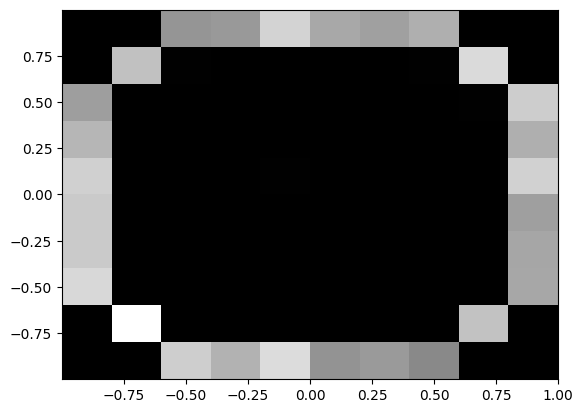

In [6]:
sobelx = cv2.Sobel(src = gray_image, ddepth = cv2.CV_64F, dx = 1, dy = 0, ksize = 5)
sobely = cv2.Sobel(src = gray_image, ddepth = cv2.CV_64F, dx = 0, dy = 1, ksize = 5)
sobel_normal = np.sqrt(sobelx**2 + sobely**2) + 1e-6

sobelx = sobelx/sobel_normal
sobely = sobely/sobel_normal

plt.hist2d(x = sobelx.ravel(), y = sobely.ravel(), bins = 10, cmap = 'gray')